<a href="https://colab.research.google.com/github/juancssantos/MVP_PUC/blob/main/MVP_PUC_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                    **Gym Members Exercise Dataset**


## **Sobre o dataset**

   Este conjunto de dados fornece uma visão geral detalhada das rotinas de exercícios, atributos físicos e métricas de condicionamento físico dos membros da academia. Ele contém 973 amostras de dados de academia, incluindo indicadores-chave de desempenho, como frequência cardíaca, calorias queimadas e duração do treino. Cada entrada também inclui dados demográficos e níveis de experiência, permitindo uma análise abrangente dos padrões de condicionamento físico, progressão do atleta e tendências de saúde.

**Descrição dos campos:**

Age: Idade do membro da academia.

Gender: Gênero do frequentador da academia (Masculino ou Feminino).

Weight (kg): Peso do membro em quilogramas.

Height (m): Altura do membro em metros.

Max_BPM: Frequência cardíaca máxima (batimentos por minuto) durante as sessões de treino.

Avg_BPM: Frequência cardíaca média durante sessões de treino.

Resting_BPM: Frequência cardíaca em repouso antes do treino.

Session_Duration (horas): Duração de cada sessão de treino em horas.

Calories_Burned: Total de calorias queimadas durante cada sessão.

Workout_Type: Tipo de treino realizado (por exemplo, Cardio, Força, Yoga, HIIT).

Fat_Percentage: percentual de gordura corporal do membro.

Water_Intake (litros): Ingestão diária de água durante os treinos.

Workout_Frequency (dias/semana): Número de sessões de treino por semana.

Experience_Level: Nível de experiência, de iniciante (1) a especialista (3).

BMI: Índice de Massa Corporal, calculado a partir da altura e do peso.


## **Definição do Negócio**

Nosso objetivo é construir um modelo preditivo de Machine Learning que seja capaz de fazer a previsão do total de calorias queimadas (Calories_Burned) baseado nas váriaveis fornecidas no Dataset. Utilizaremos o modelo de regressão linear que seja mais adequedo para os dados fornecidos, e para isso utilizaremos as técnicas análise exploratória, seguido das fases de pré-processamento dos dados, e por fim a construção dos modelos preditivos, comparando a performance de suas métricas a fim de escolher o que melhor define o target.



# **Análise Exploratória**

In [ ]:
# Importando os pacotes que serão utilizados

# Para manipulação e tratamento dos dados
import numpy as np
import pandas as pd
import time #utilizada para funções de tempo
import matplotlib.pyplot as plt #Utilizada para gráficos
import seaborn as sns #Utilizada para gráficos

# Bibliotecas do Skit Learn
from sklearn.model_selection import train_test_split #Utilizada para separar dados pra treino e teste
from sklearn.preprocessing import StandardScaler #Utilizada para fazer a padronização dos dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error #Utilizada para fazer as metricas dos modelos preditivos
from sklearn.preprocessing import OneHotEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer



from numpy import absolute




# Importando os modelos que iremos usar
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor



# Para remover avisos de alerta
import warnings #Utilizada para avisos de alertas
warnings.filterwarnings("ignore") #Ignorar avisos de alertas. Obs.: Alertas NÃO são erros, são apenas mensagens informativas

# Para não limitar a exibição do DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.options.display.float_format = '{:.2f}'.format


In [ ]:
# Carregando os dados do CSV
df = pd.read_csv('https://raw.githubusercontent.com/juancssantos/MVP_PUC/main/gym_members_exercise_tracking.csv')


In [ ]:
# Verificamos os primeiros dados do dataset afim de observar previamente os campos e seus conteúdos
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
# Usamos info() para verificar algumas informações sobre os campos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

 Já podemos identificar que temos dois campos object que precisam ser analisados e provavelmente transformados.

 Também temos a informação que não há campos nulos no dataset.

In [ ]:
# Também podemos observar que não há campos duplicados no dataset usando a função duplicated e sum
df.duplicated().sum()

0

In [ ]:
# Vamos fazer uma contagem de dados agrupados por campos para entender quais seriam do tipo numérico e quais podem ser considerados como categoria.
df.nunique()

,0
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


Com o resultado já podemos entender, que Gender e Workout_Type são campos de categoria (sendo eles object, trataremos posteriormente).

Os campos restantes vamos tratar como campos numéricos, a fim de idetificar possíveis outliers.


In [ ]:
## Usamos describe para explorar algumas informações estatísticas.
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
# Vamos avaliar os outliers das colunas que são do tipo não categóricas.
# Para isso, criamos um array somente com as colunas que classificamos como numéricas.
colunas_numericas = df[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned','Fat_Percentage','Water_Intake (liters)','BMI']]

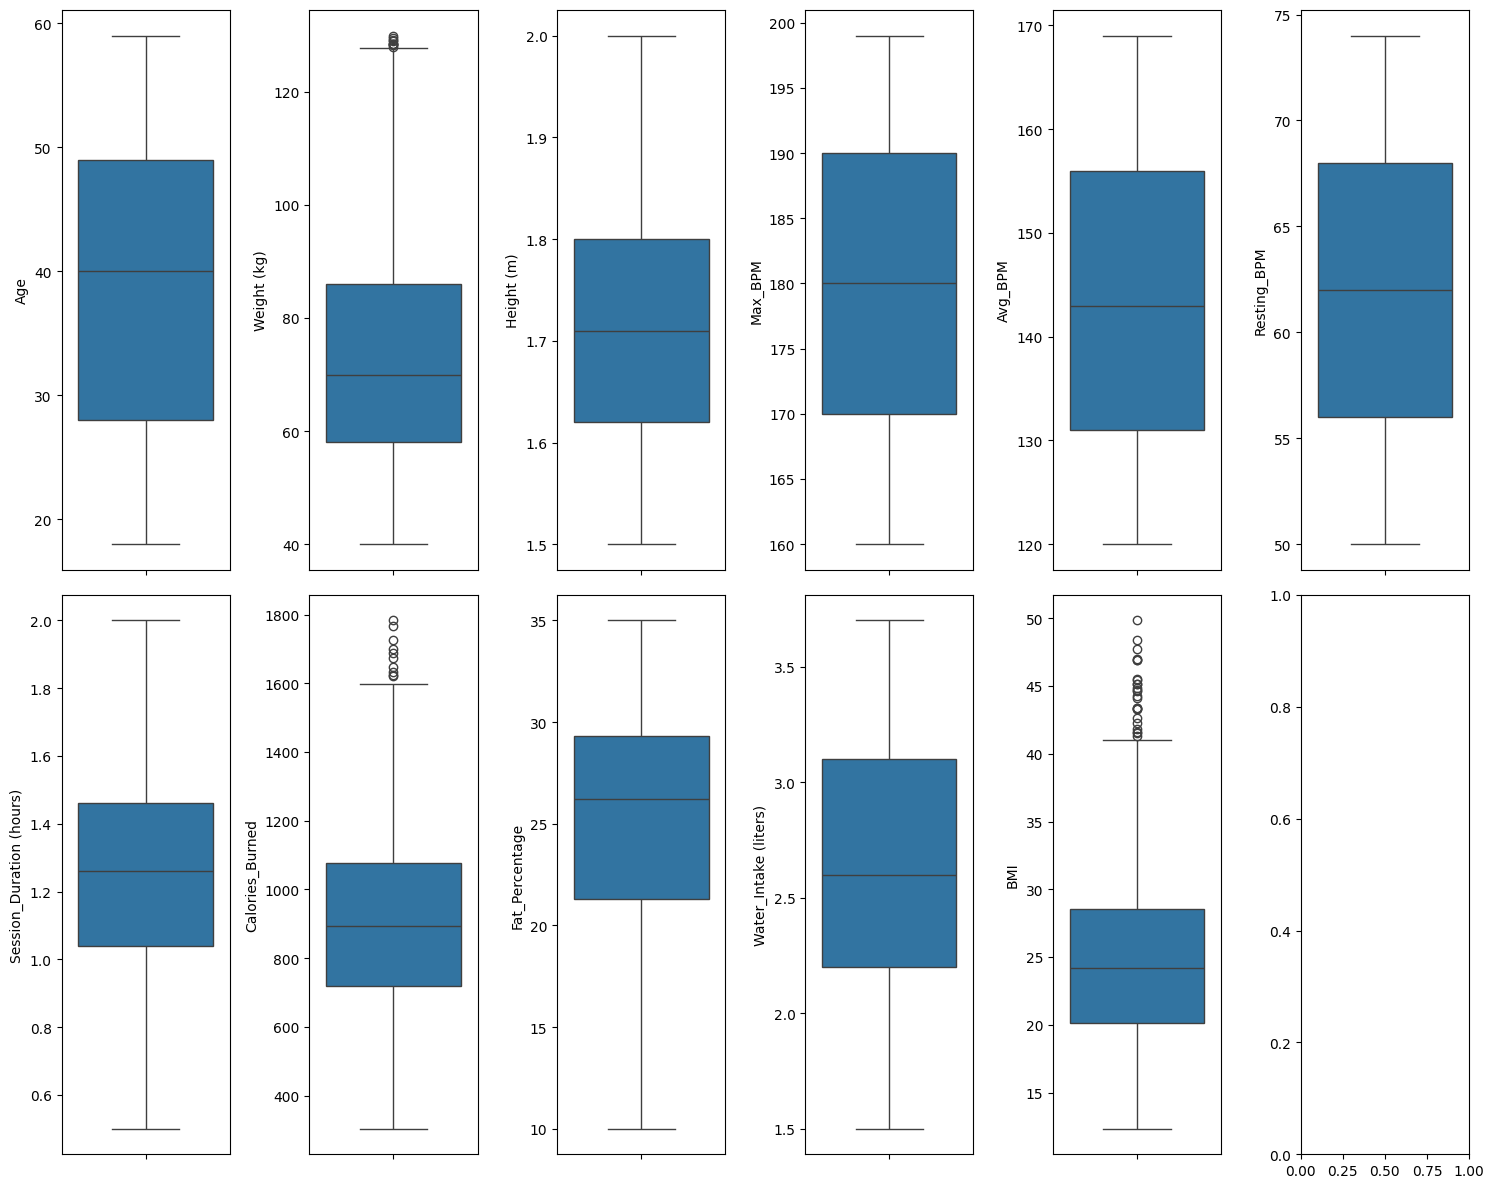

In [ ]:
# Agora vamos criar uma função que lista todos os gráficos dessas colunas de uma vez para identificar possíveis outliers.

def identifica_outliers(tipo_grafico):

# Primeiro, definimos o tamanho da tela para exibição dos gráficos:
 plt.rcParams["figure.figsize"] = [15.00,12.00]
 plt.rcParams["figure.autolayout"] = True

# Então, definimos em quantas linhas e colunas queremos exibir os gráficos, dependendo do tipo de gráfico que vamos escolher (1=boxplot, 2=histplot):
 if tipo_grafico == 1:
   linha = 0
   coluna = 0
   f, axes = plt.subplots(2,6)
   for i in colunas_numericas:
    sns.boxplot(data=df, y=i, ax=axes[linha][coluna])
    coluna = coluna + 1
    if coluna ==6:
        linha = linha + 1
        coluna = 0


 if tipo_grafico == 2:
  linha = 0
  coluna = 0
  f, axes = plt.subplots(4,3)
  for i in colunas_numericas:
    sns.histplot(data=df, x=i, ax=axes[linha][coluna])
    coluna = coluna + 1
    if coluna ==3:
      linha = linha + 1
      coluna = 0


 plt.show()

identifica_outliers(1)

Podemos observar alguns possíveis outliers nas colunas Weight, Calories_Burned e BMI.

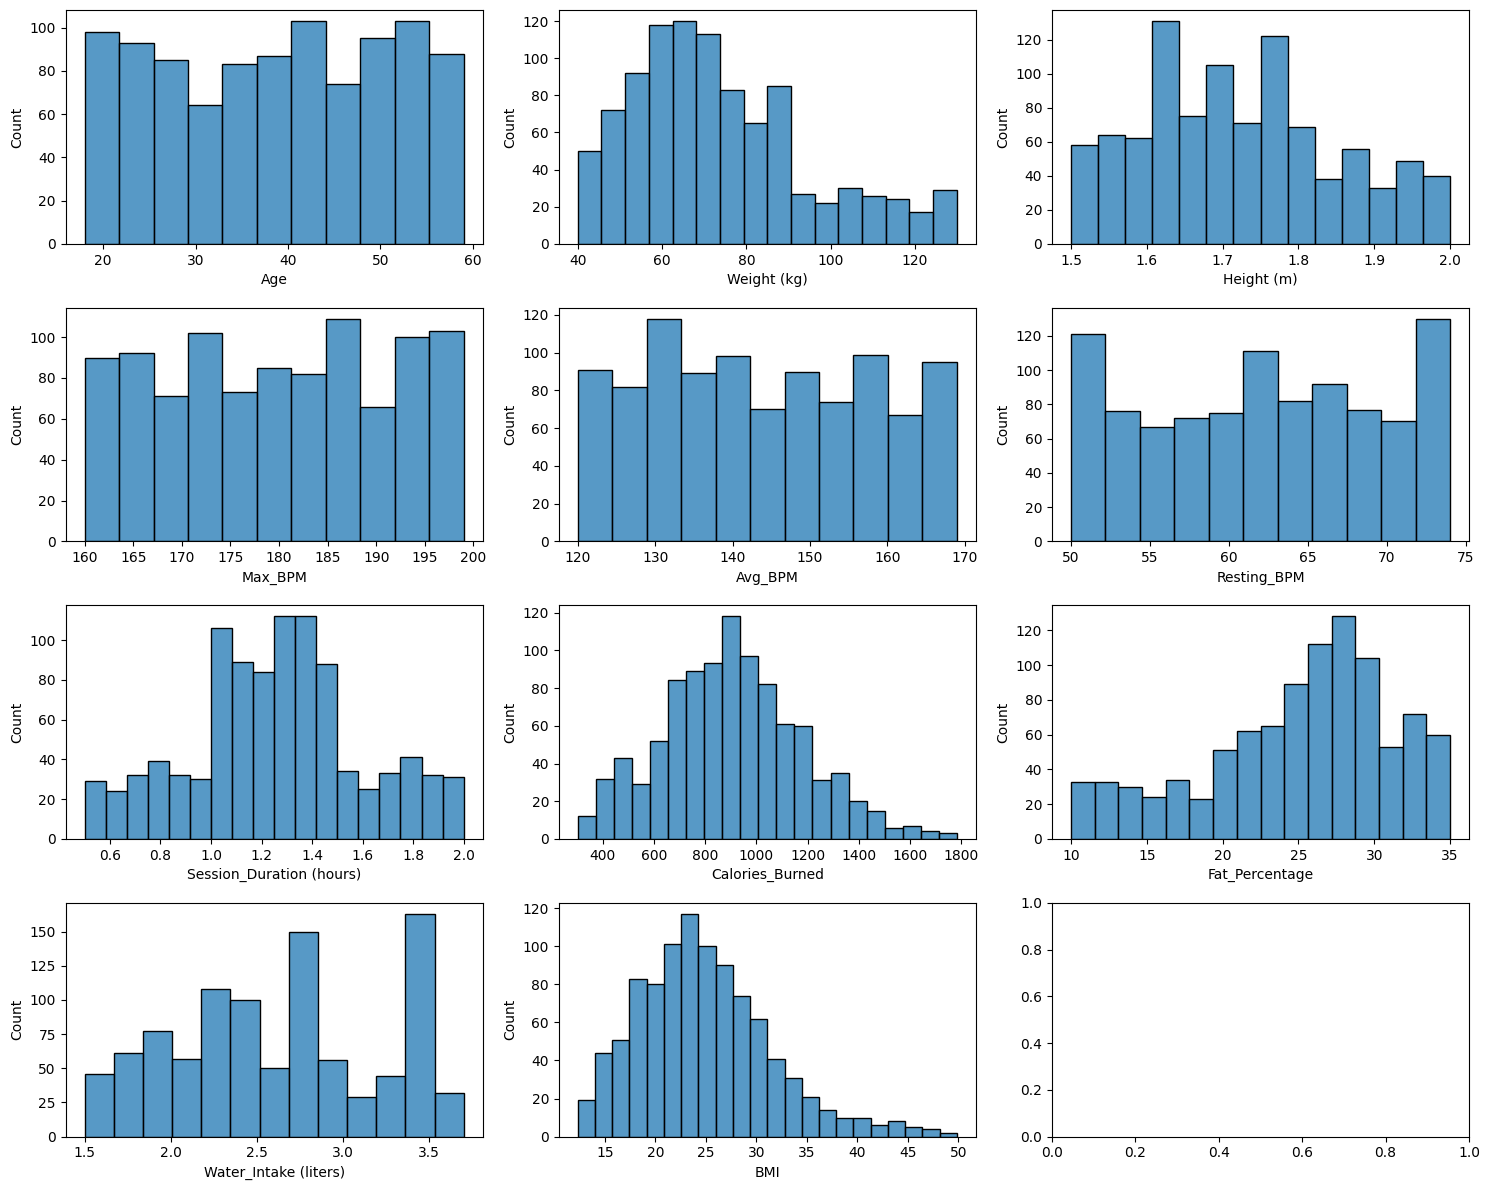

In [ ]:
# Vamos realizar um histograma para analisarmos a distribuição desses dados em relação as colunas

identifica_outliers(2)

 Aqui já podemos perceber que não temos uma distribuição normal dos dados para as colunas que apresentam outliers.

 Devemos nos atentar a isso na etapa de pré-processamento

<Axes: >

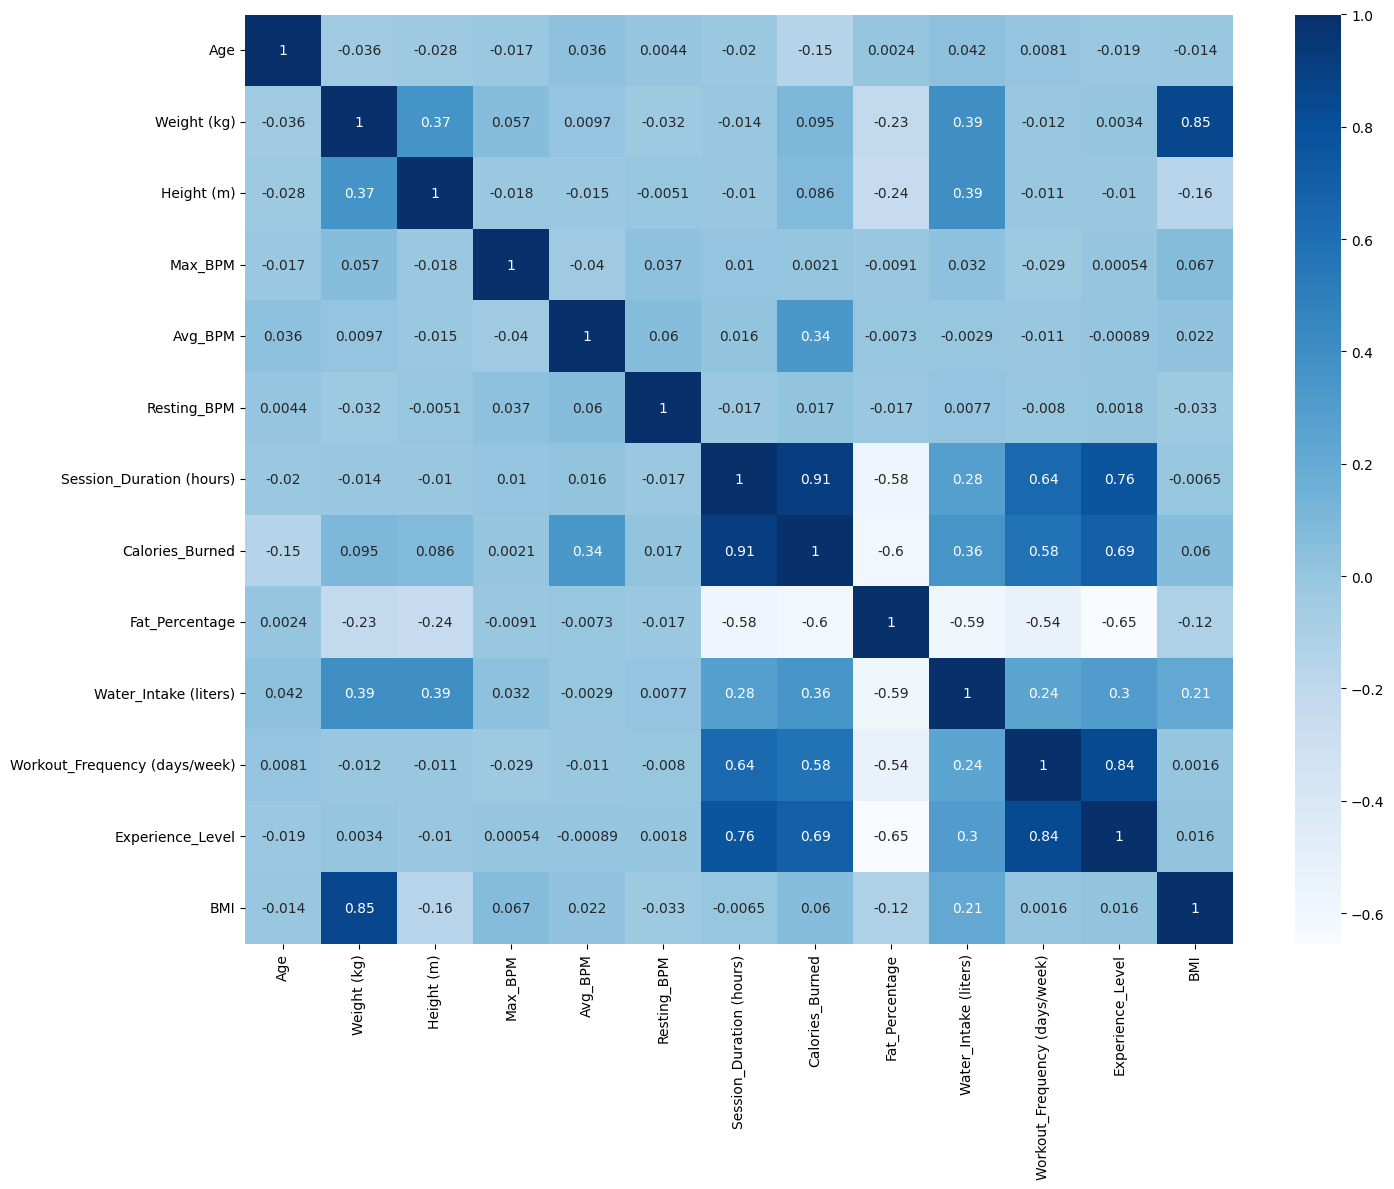

In [ ]:
# Nesse gráfico podemos analisar também a correlação entre as variáveis preditoras.
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='Blues')

 Percebemos que Weight, e BMI tem uma correlação fraca com o nosso target (Calories_Burned). As correlações mais relevantes são Session_Duration, Workout_Frequency e Experience_Level
plt.figure(figsize=(16,10))

#Etapas do Pré-Processamento:

*   Tratamento de Ouliers
*   Transformação das colunas categóricas
*   Padronização dos Dados





In [ ]:
# Começamos aqui analisando a quantidade de dados antes de remover os outliers
df.shape

(973, 15)

In [ ]:
# Primeiro criar uma função para remover os outliers baseado no intervalo interquartílico (IQR), que é uma técnica comum para detectar e eliminar valores fora de um intervalo aceitável

df_tratamento = df.copy()

def trata_outliers(df):
 colunas_outliers = df[['Weight (kg)', 'Calories_Burned','BMI']]
 for coll in colunas_outliers:
    if df[coll].dtype in ["int64", "float64"]:
        Q1 = df[coll].quantile(0.25)
        Q3 = df[coll].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[coll] >= lower_bound) & (df[coll] <= upper_bound)]
 return df

df_tratamento = trata_outliers(df_tratamento)

In [ ]:
df_tratamento.shape

(931, 15)

In [ ]:
# Vamos criar uma função que usa OneHotEncoder para transformar as colunas categoricas em numéricas afim de melhorar o entendimento dos nossos modelos preditivos
def transforma_dados_categoricos(df):
     lb = LabelEncoder()
     df['Gender'] = lb.fit_transform(df['Gender'])
     df['Workout_Type'] = lb.fit_transform(df['Workout_Type'])
     df.dropna(inplace=True)
     return df

df_tratamento = transforma_dados_categoricos(df_tratamento)
df_tratamento.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [ ]:
# Também precisamos de uma função para padronizar as colunas para que fiquem todas na mesma escala
def padroniza_dados(df):
    colunas_escala = ["Age","Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","Workout_Frequency (days/week)","BMI"]
    obj_padrao = StandardScaler()
    scaled_data = obj_padrao.fit_transform(df[colunas_escala])
    df[colunas_escala] = scaled_data
    return df

df_tratamento = padroniza_dados(df_tratamento)
df_tratamento.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,1.419723,1,0.832920,-0.103497,0.008689,0.948726,-0.295231,1.282767,1313.0,3,-2.013600,1.479839,0.749842,3,1.022724
1,0.594447,0,0.145693,-1.504463,-0.078296,0.528990,0.520780,0.134331,883.0,1,1.407550,-0.852191,0.749842,2,1.332428
2,-0.560939,0,-0.203049,-0.492654,-1.122118,-1.499733,-1.111242,-0.425164,677.0,0,1.327241,-0.519044,0.749842,2,0.078125
3,-1.138632,1,-0.967204,-0.181328,0.878541,1.438418,-0.839238,-1.956413,532.0,2,0.588401,-0.852191,-0.346081,1,-1.005841
4,-0.065774,1,-1.331332,0.519155,0.704570,1.018682,0.792784,-1.809178,556.0,2,0.652648,0.313824,-0.346081,1,-1.697515


#Construção dos Modelos Preditivos

*   Separação do conjunto de dados em treino e teste
*   Comparação dos modelos preditivos executados no conjunto de treino a partir das métricas de média e desvio padrão
* Execução dos modelos no conjunto de teste e escolha do melhor modelo para o negócio



In [ ]:
# Definimos a variável Target
X = df_tratamento.drop(columns=['Calories_Burned'])
y = df_tratamento['Calories_Burned']

# Separamos a base de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression: MSE 1446.05 (384.83) - RMSE 38.03
Ridge: MSE 1445.78 (385.33) - RMSE 38.02
Lasso: MSE 1446.34 (400.70) - RMSE 38.03
Random Forest Regressor: MSE 2177.83 (422.31) - RMSE 46.67
SVR: MSE 56676.13 (7270.49) - RMSE 238.07
XgBoost Regressor: MSE 1455.51 (353.10) - RMSE 38.15


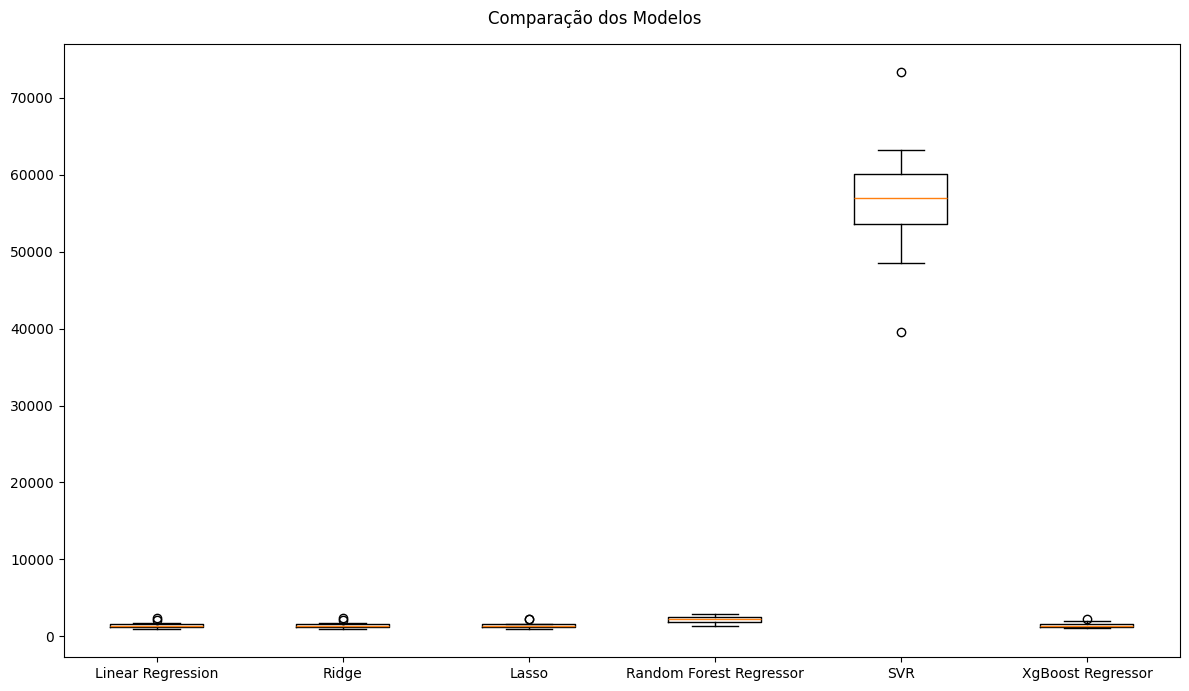

In [ ]:
# Definimos um seed global para não variar a execução dos dados

np.random.seed(42)

# Escolhemos os modelos preditivos que iremos usar para analisar o que melhor prevê o target
modelos ={
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'XgBoost Regressor': XGBRegressor(random_state=42),
}


# Listas para armazenar os resultados
results = []
names = []
kfold = KFold(n_splits=15, shuffle=True, random_state=42)


# Avaliação dos modelos
for name, model in modelos.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_results = absolute(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, cv_results.mean(), cv_results.std(), np.sqrt(cv_results.mean()))
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(12,7))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Podemos observar que o XgBoost obteve a melhor performance considerando o MSE e observando o boxplot, dentre os modelos no conjunto de treinamento. Vamos usa-lo no conjunto de teste. Mas, primeiro vamos analisar os hiperparametros do modelo

In [ ]:
#Adicionamos o modelo que escolhemos
xgb = XGBRegressor()

#escolhomes alguns hiperparametros para comparação
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


#Usamos o RandomizedSearcchCV para fazer 100 iterações e descobrir os hiperparametros
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

#Fazemos o fit no conjunto de treino
random_search.fit(X_train, y_train)

#Conseguimos o resultado
print("Melhores hiperparâmetros encontrados: ", random_search.best_params_)
print("Melhor score com hiperparâmetros: ", random_search.best_score_)

Melhores hiperparâmetros encontrados:  {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Melhor score com hiperparâmetros:  -399.08395683019194


Agora que conseguimos os hiperparametros, vamos usar no conjunto de teste. Primeiro, testaremos o modelo sem os hiperparametros

In [ ]:
# Criando o modelo com o conjunto de treino
modelo = XGBRegressor()
modelo.fit(X_train, y_train)

#Fazendo a predição no conjunto de teste
predicao=modelo.predict(X_test)

#Resultado no conjunto de teste
mse = mean_squared_error(y_test, predicao)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 1106.38
RMSE 33.26


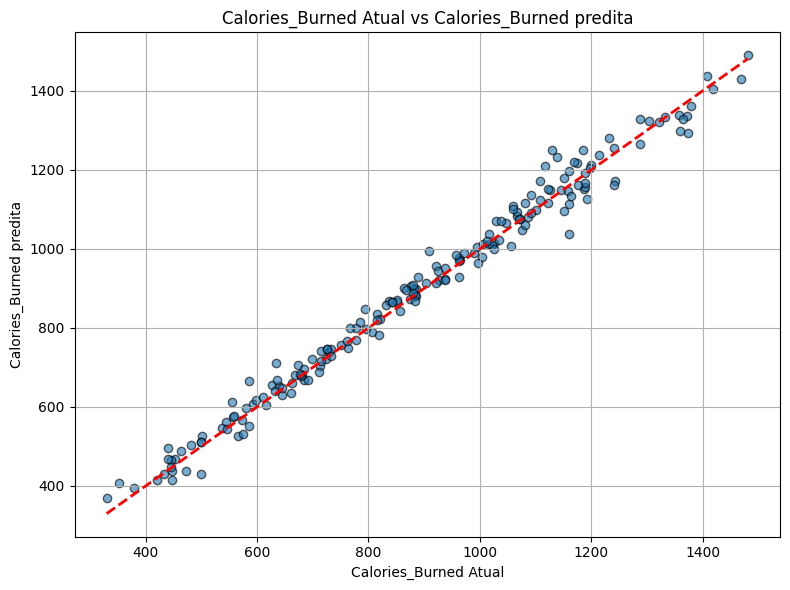

In [ ]:
# Podemos ver um gráfico scatter para demonstrar o quanto o modelo acertou na predição sem hiperparametros.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicao, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.title("Calories_Burned Atual vs Calories_Burned predita")
plt.xlabel("Calories_Burned Atual")
plt.ylabel("Calories_Burned predita")
plt.grid(True)
plt.show()

Agora analisamos com os hiperparametros. Podemos ver que conseguimos uma melhoria.




In [ ]:
# Criando o modelo com o conjunto de treino
modelo = XGBRegressor(subsample=0.8, n_estimators=300, max_depth=3, learning_rate=0.1, colsample_bytree=1.0)
modelo.fit(X_train, y_train)

#Fazendo a predição no conjunto de teste
predicao=modelo.predict(X_test)

#Resultado no conjunto de teste
mse = mean_squared_error(y_test, predicao)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 221.21
RMSE 14.87


Observamos que o modelo XGBRegressor se saiu ainda melhor no conjunto de teste usando hiperparametros.

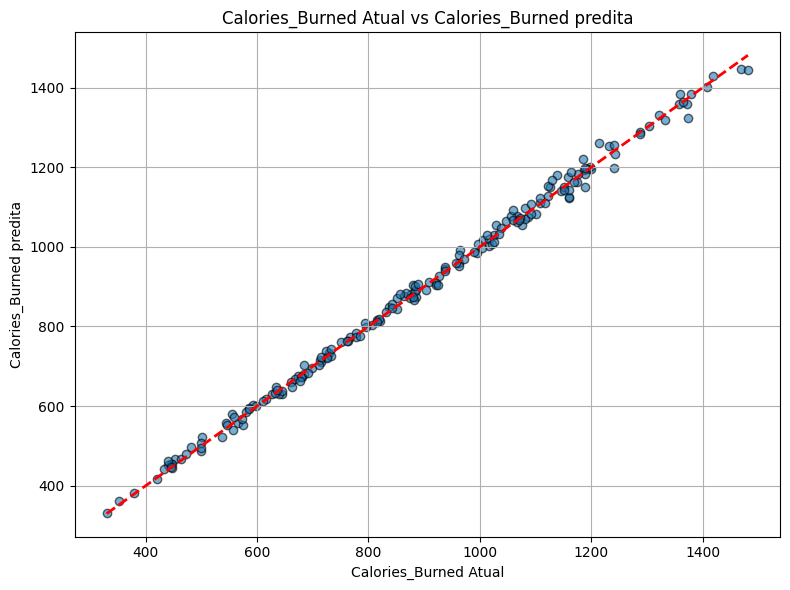

In [ ]:
# Podemos ver um gráfico scatter para demonstrar o quanto o modelo acertou na predição.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicao, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.title("Calories_Burned Atual vs Calories_Burned predita")
plt.xlabel("Calories_Burned Atual")
plt.ylabel("Calories_Burned predita")
plt.grid(True)
plt.show()


* Cada ponto azul representa uma um par de valor no eixo x, y (Calories_Burned atual, Calories_Burned predita).
* A linha vermelha é o predição perfeita, onde o valor previsto seria igual ao valor real.
* Podemos ver que a maioria dos pontos ficaram próximos da linha vermelha, indicando que a predição foi bem sucedida.


#Conclusão

Chegamos a conclusão que o modelo XGBRegressor teve um desempenho superior aos modelos concorrentes, sendo o escolhido para a conclusão desse projeto. Além das etapas de pré-processamento, também usamos RandomGridSearchCV para escolher os hiperparametros. A escolha do RandomGridSearchCV em vez de GridSearchCV foi proposital, devido ao tempo de execução, pois no RandomGridSearchCV podemos escolher o número de iterações.